
# **Boston Housing Price Prediction**

## Overview
This project focuses on predicting the median value of owner-occupied homes in Boston, using the classic Boston Housing dataset. The dataset contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts.

## Objective
The primary goal is to build a predictive model to estimate the median value of homes (`MEDV`) based on various predictor variables. This analysis will provide insights into the housing market of Boston and identify key drivers of median house value.

## Dataset
The dataset consists of 506 cases, each with 14 attributes:

- `CRIM`: Per capita crime rate by town
- `ZN`: Proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: Proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: Nitric oxides concentration (parts per 10 million)
- `RM`: Average number of rooms per dwelling
- `AGE`: Proportion of owner-occupied units built prior to 1940
- `DIS`: Weighted distances to five Boston employment centers
- `RAD`: Index of accessibility to radial highways
- `TAX`: Full-value property-tax rate per `$10,000`
- `PTRATIO`: Pupil-teacher ratio by town
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes in $1000's

## Methodology
The project employs regression analysis, starting with a simple linear regression model and then exploring a Random Forest regression approach to capture more complex relationships in the data. The analysis includes:

- Exploratory Data Analysis (EDA)
- Data Preprocessing and Feature Engineering
- Model Building and Evaluation (Times two)

The final aim is to develop a model that accurately predicts housing prices and provides insights into what attributes most affect the median value of homes in Boston.




## Import Relevant Libraries

We begin by importing essential libraries for data manipulation, visualization, preprocessing, and machine learning.



In [120]:
# Import core libraries
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load the Dataset

The dataset is loaded using pandas. We will take a quick look at the first few rows to understand the structure.


In [121]:
# Load dataset
df = pd.read_csv("HousingData.csv")

In [123]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [124]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Data Cleaning and Preprocessing

We check for missing values and data types to ensure the dataset is ready for analysis. If missing values exist, we handle them accordingly.


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [126]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [127]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


## Visualize the Data

Visualization helps in understanding the relationships and distributions of the data. We use a heatmap to explore feature correlations and a histogram to view the price distribution.


In [128]:
from sklearn.impute import SimpleImputer

numberical_col  = ['CRIM', 'ZN', 'INDUS', 'AGE','LSTAT']
numberical_imputer = SimpleImputer(strategy = 'mean' )
df[numberical_col] = numberical_imputer.fit_transform(df[numberical_col])

In [129]:
categorical_cols = ['CHAS']
categorical_imputer = SimpleImputer(strategy = 'most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


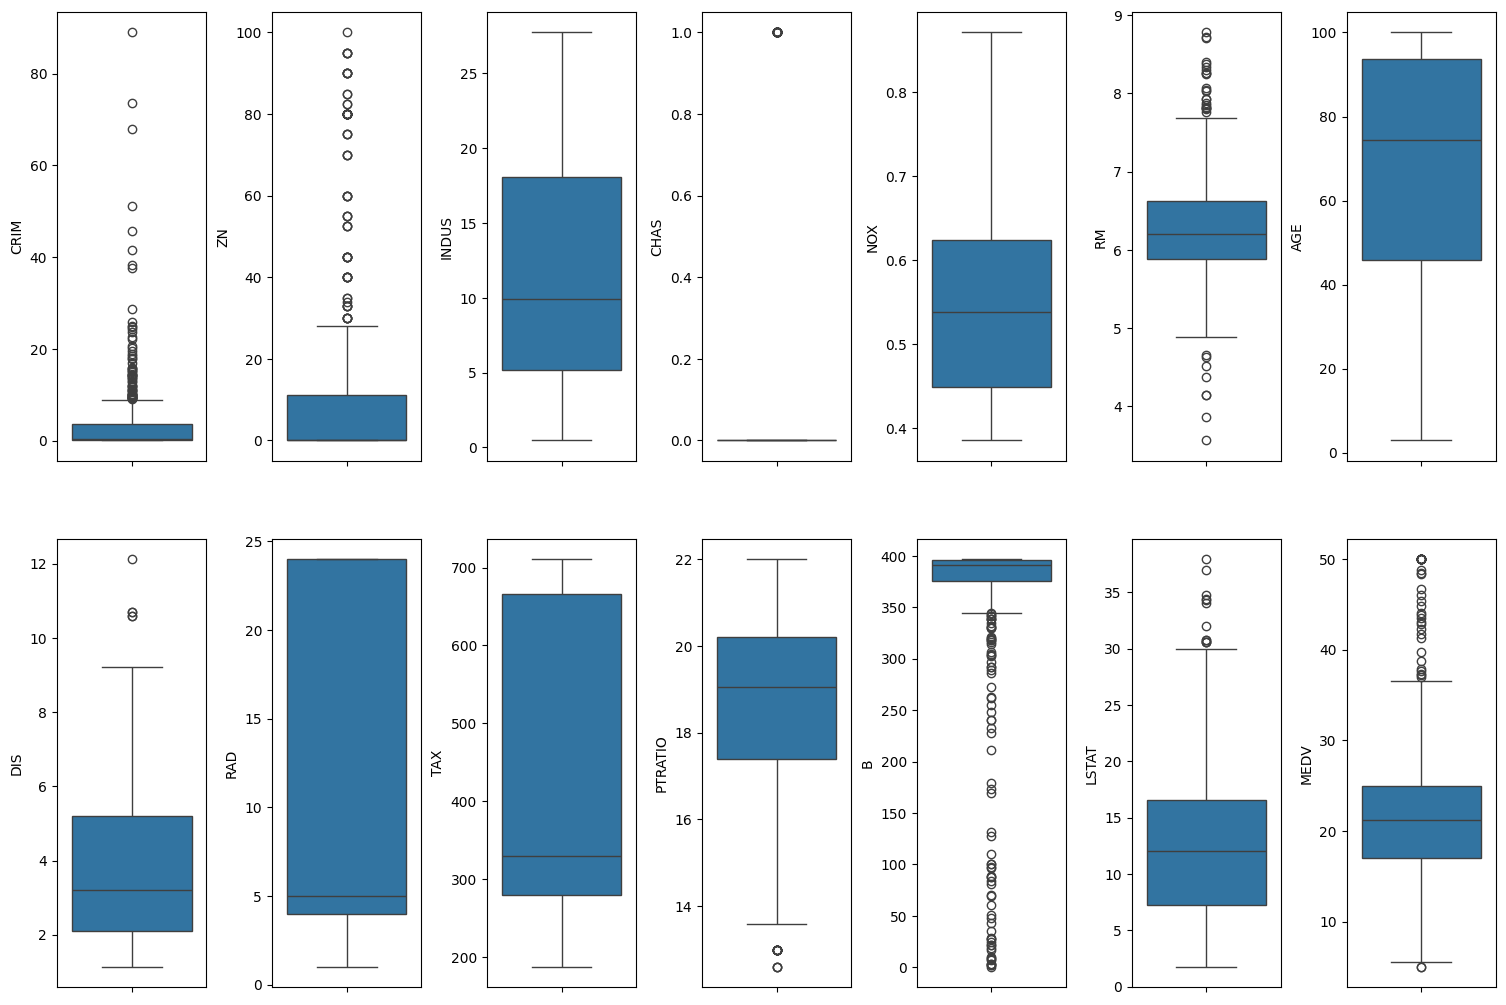

In [131]:
fig,ax = plt.subplots(ncols= 7,nrows = 2,figsize=(15,10))
index=0
ax = ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col,data = df,ax = ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad= 0.7,h_pad=5.0)

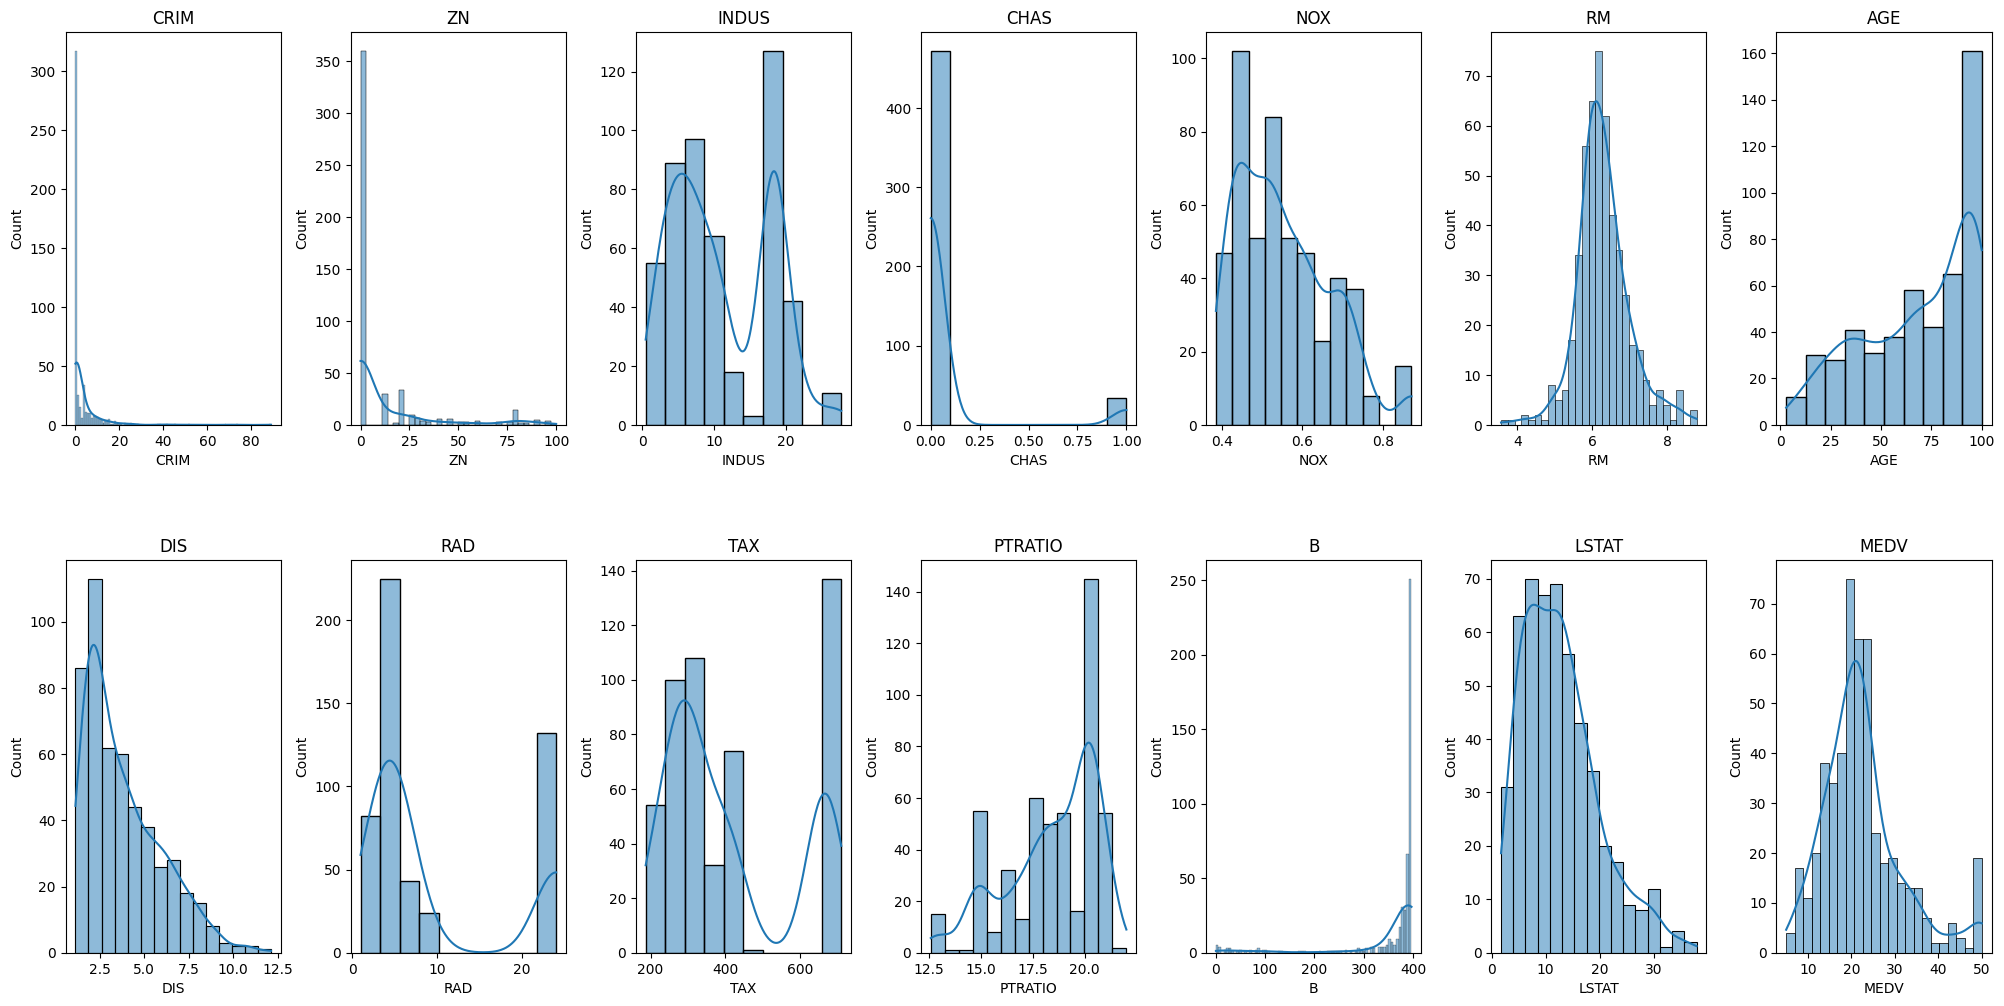

In [132]:
# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()

## Min-Max Normalization

Min-Max normalization rescales the data to a [0, 1] range. It's useful for algorithms sensitive to feature scale.

In [133]:
from sklearn.preprocessing import MinMaxScaler
cols=['CRIM', 'ZN','TAX','B']
scaler = MinMaxScaler()
df[cols] = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)

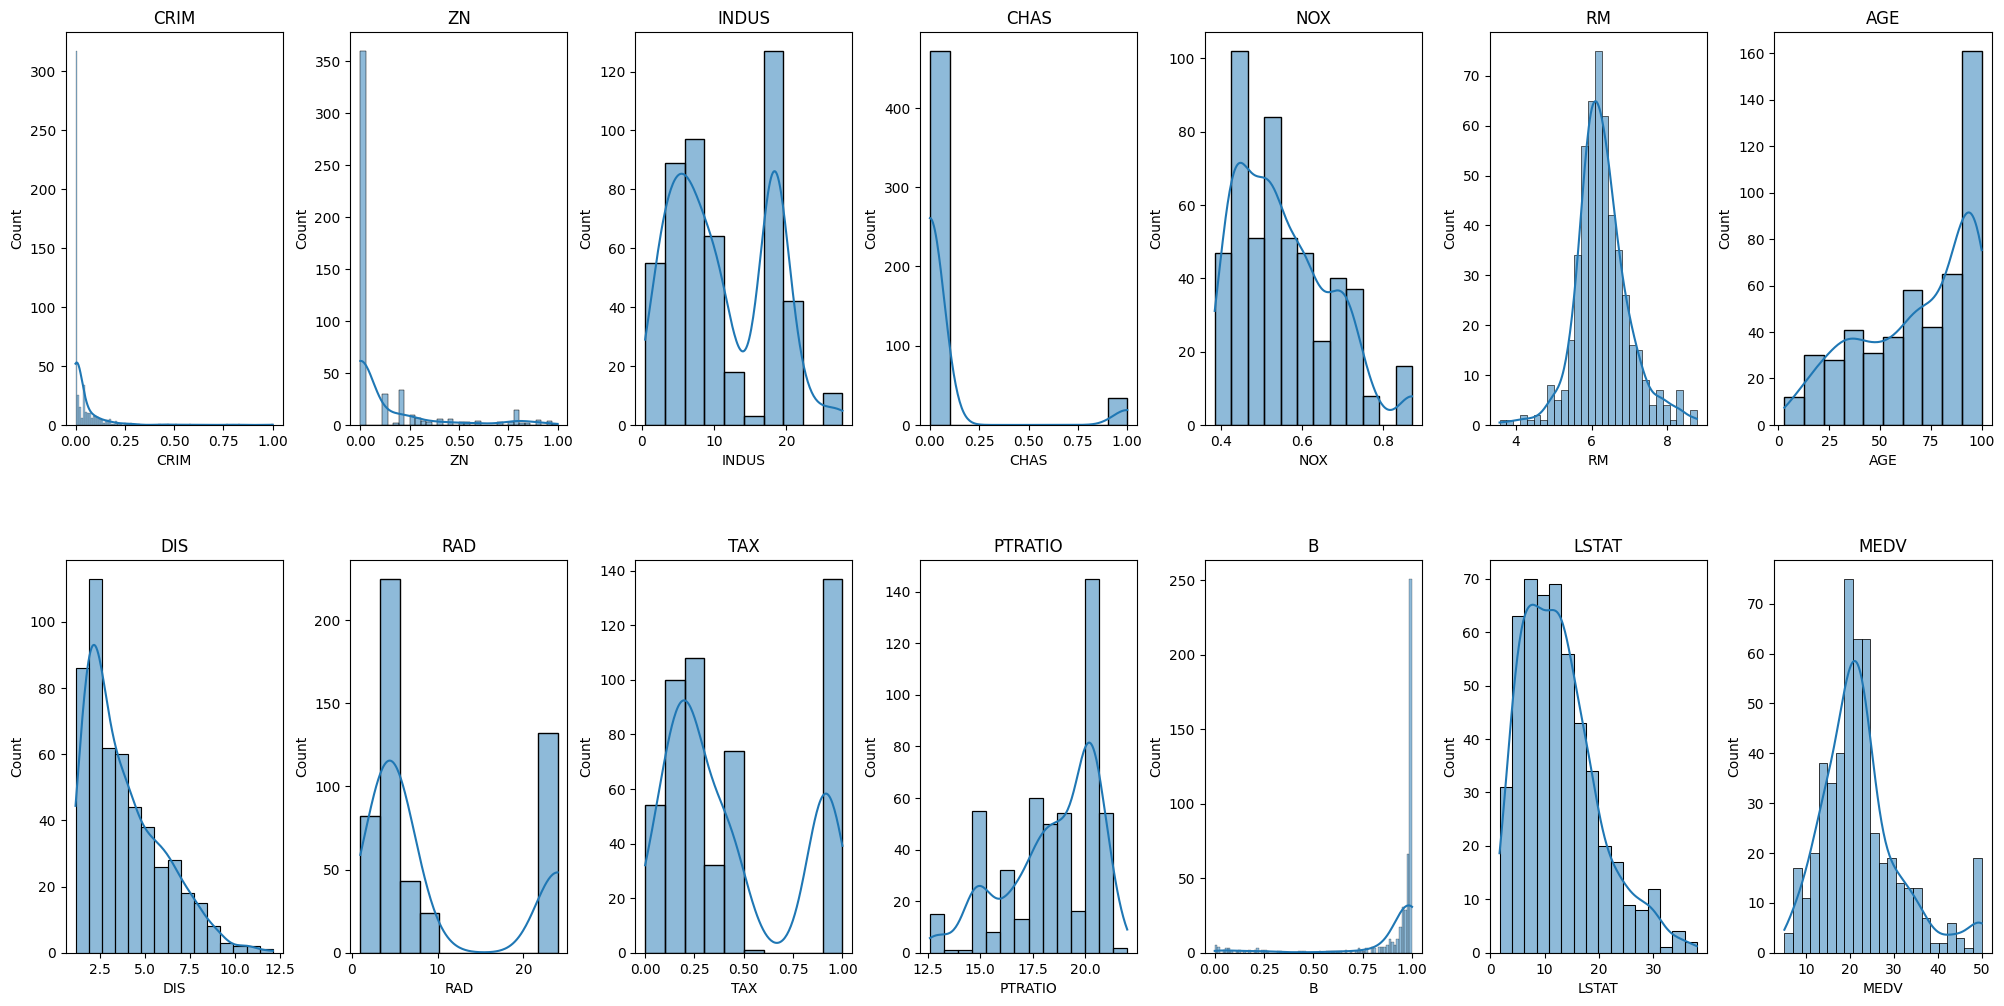

In [134]:
# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()

## Standardization

Standardization centers the data around 0 with a standard deviation of 1. This technique is especially useful for models assuming Gaussian distribution.


In [135]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled_cols = scaled.fit_transform(df[cols])
df[cols] = pd.DataFrame(scaled_cols,columns = cols)

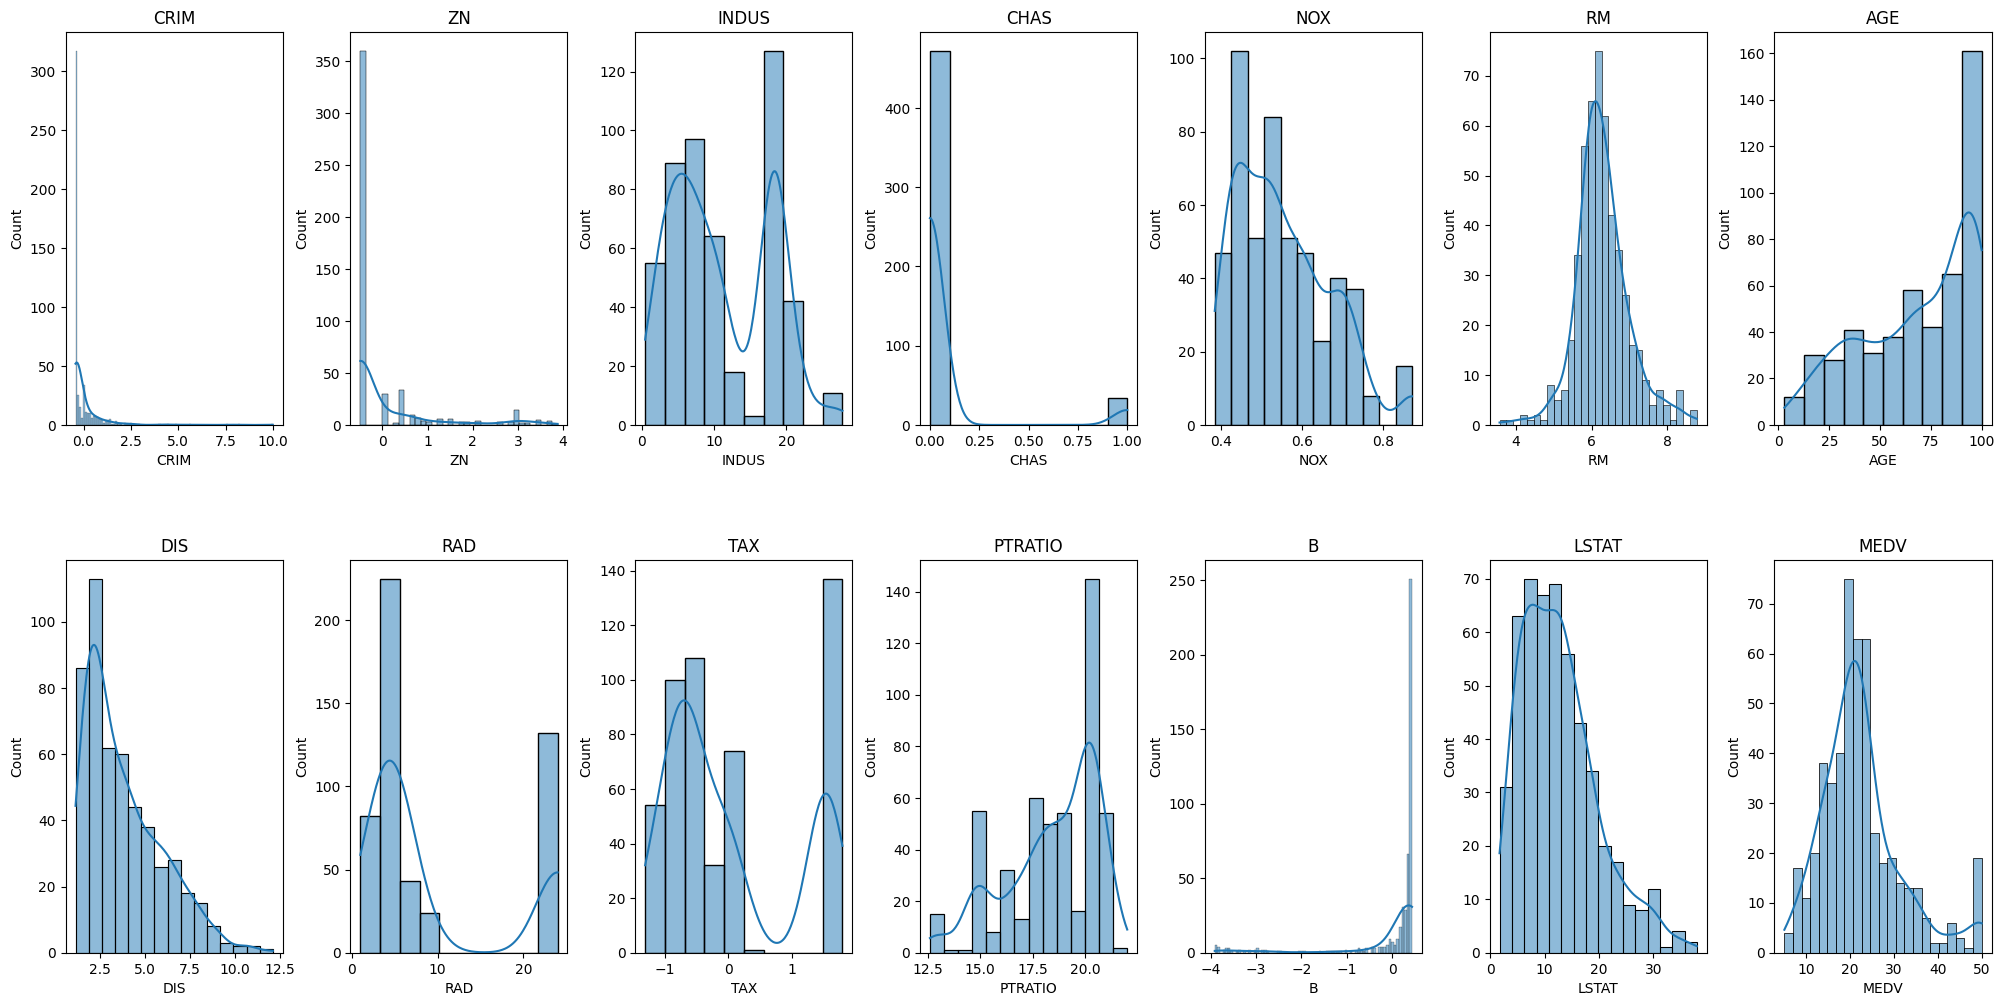

In [136]:
# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()

<Axes: >

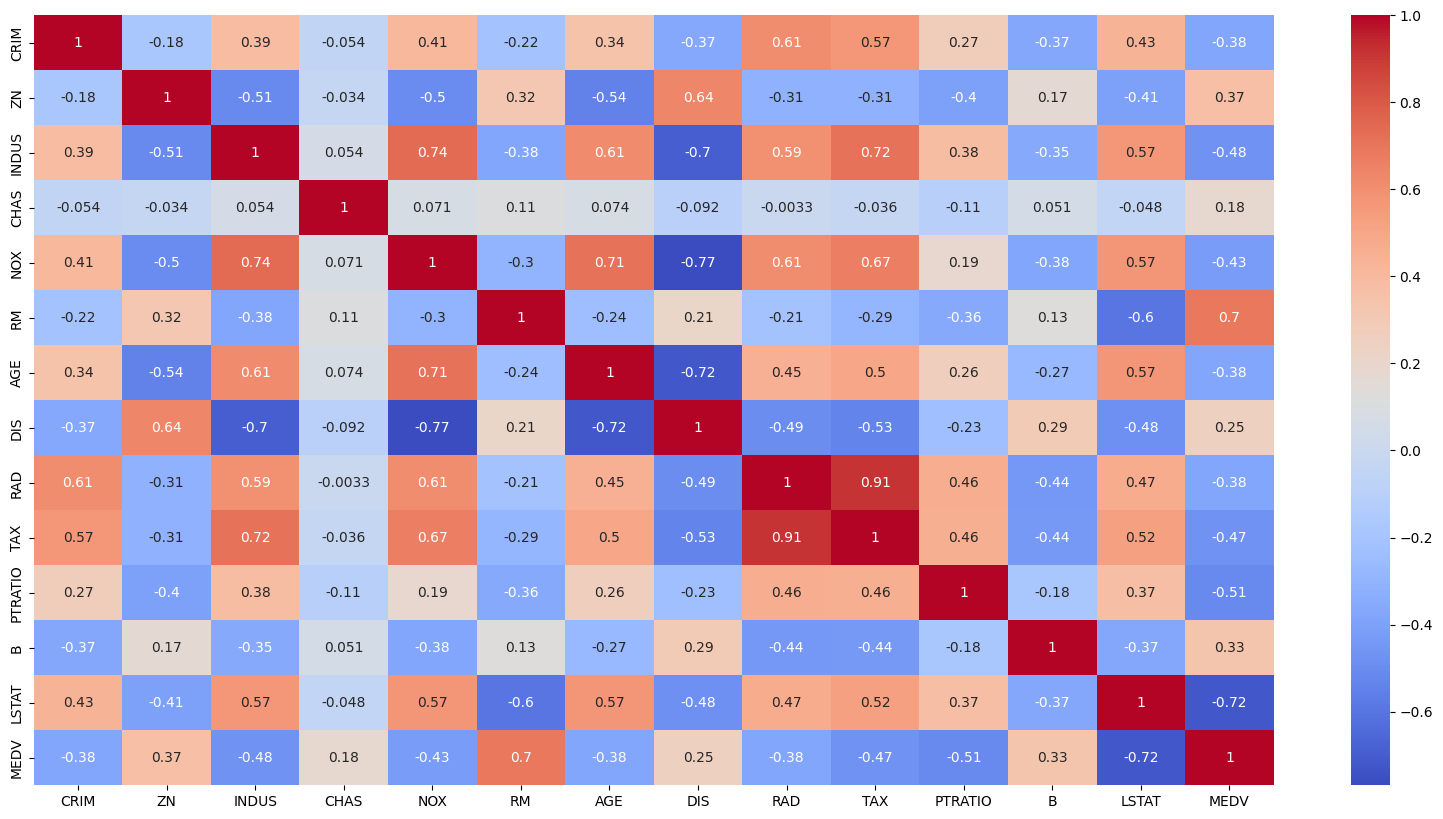

In [137]:
corr = df.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

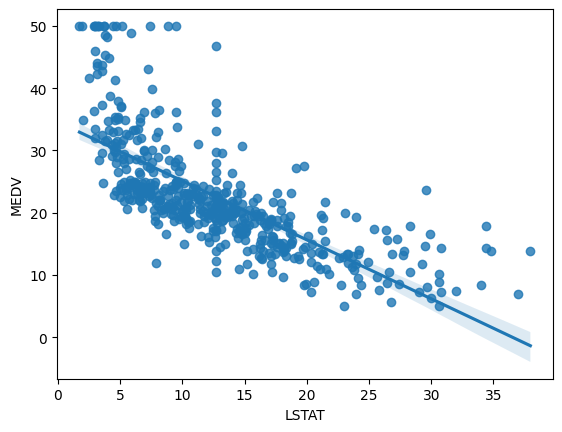

In [138]:
sns.regplot(y = df['MEDV'],x= df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

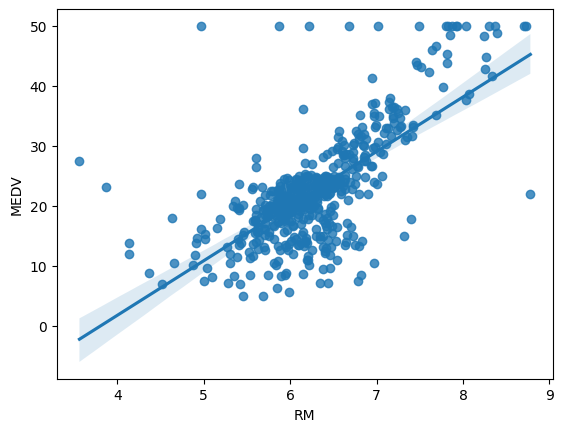

In [139]:
sns.regplot(y = df['MEDV'],x= df['RM'])

In [140]:
inputs = df.drop(columns= ['MEDV','RAD'])
targets = df['MEDV']

In [141]:
inputs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.422328,0.296443,2.31,0.0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.980000
1,-0.419870,-0.489639,7.07,0.0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.140000
2,-0.419872,-0.489639,7.07,0.0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.030000
3,-0.419277,-0.489639,2.18,0.0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.940000
4,-0.414981,-0.489639,2.18,0.0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,12.715432


In [142]:
targets.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Separate Input and Output Columns

The features (independent variables) are stored in `X`, and the target variable (house price) is stored in `y`.


In [143]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

## Split the Data

The dataset is split into training (80%) and testing (20%) sets to evaluate model performance on unseen data.


In [144]:
from sklearn.metrics import mean_squared_error, r2_score
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model 1 - Linear Regression**

Linear Regression is used as a baseline model. We evaluate it using Mean Squared Error and R² score.


In [145]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
# Predict
y_pred = model.predict(X_test)
# Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 25.04465329145445
R^2 Score: 0.6584840954311384


## **Model 2 - Random Forest Regressor**

We train a Random Forest Regressor, which often performs better on complex datasets due to its ensemble nature. Evaluation metrics are again used to compare performance.


In [147]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [148]:
# Predict
y_pred_rf = rf_model.predict(X_test)
# Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R^2 Score:', r2_score(y_test, y_pred_rf))

Mean Squared Error: 8.18362495098039
R^2 Score: 0.8884057988241343
